In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as s
# import docx
# import descr_tables as dt
import dataframe_image as dfi
%matplotlib inline

In [3]:
data = pd.read_csv(r"C:\\Users\\Giorgis\\Desktop\\Projects\\ADTA coursework\\partI\\Census.csv")
data.head()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
0,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,NaN,4
1,7394832,E12000001,H,3,1,2,1,1,2,1,2,1,1,-9,-9,-9,-9,NaN,-9
2,7394719,E12000001,H,2,1,1,7,2,2,1,1,1,2,5,8,2,-9,NaN,2
3,7394840,E12000001,H,1,1,2,6,4,2,1,3,1,2,5,9,5,-9,NaN,4
4,7394711,E12000001,H,2,1,1,1,1,1,1,1,1,1,-9,-9,-9,-9,NaN,-9


In [4]:
age_only = pd.DataFrame(data['Age'])
hours = pd.DataFrame(data['No of hours'])

# The frequency graph of the age attribute


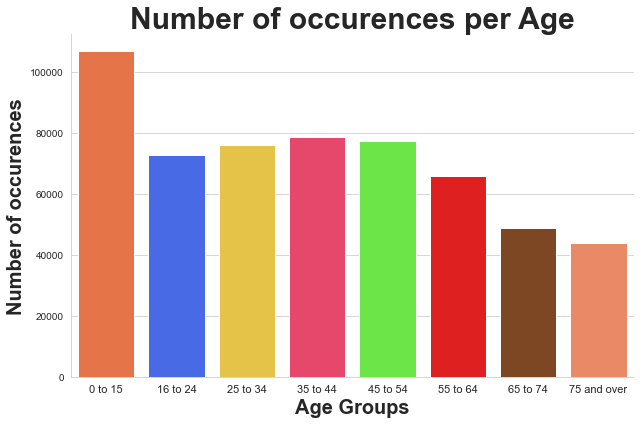

In [5]:
plt.figure(figsize=(9, 6))

sns.set_style('whitegrid')

ax = sns.countplot(x='Age', data=data, palette=["#ff692e", "#2e5cff", "#ffd12e", 
                                                          "#ff2e5c", "#5cff2e", "#ff0000", 
                                                          "#8b4513", "#ff7f50"])


ax.set_xlabel('Age Groups', size=20, fontweight='bold')
ax.set_ylabel('Number of occurences', size=20, fontweight='bold')
ax.set_title('Number of occurences per Age', size=30, fontweight='bold')

# Altering the x axis labels values' names
ax.set_xticklabels(('0 to 15', '16 to 24', '25 to 34', '35 to 44', '45 to 54',
                   '55 to 64', '65 to 74', '75 and over')) 

plt.setp(ax.get_xticklabels(), size=11)

plt.tight_layout()
sns.despine()

plt.savefig('freq_Age.jpeg')

In [44]:
my_data = data
col_name = 'Age'
dictionary = {1: '0 to 15', 2: '16 to 24', 3: '25 to 34', 4: '35 to 44', 5: '45 to 54',
       6: '55 to 64', 7: '65 to 74',
       8: '75 and over'}

In [45]:
freq_arr = my_data[col_name].value_counts(sort=True)
perc_arr = my_data[col_name].value_counts(normalize=True, sort=True)
percentages = []
the_list = []

for i in perc_arr.index:
    val = perc_arr[i] * 100
    val = round(val, 1)
    percentages.append(str(val) + '%')

cnt = 0
for i in freq_arr.index:
    col_descr = dictionary[i]
    the_list.append([[col_descr], [freq_arr[i]], [percentages[cnt]]])
    cnt += 1

df = pd.DataFrame(the_list, columns=[col_name, 'Frequency', 'Percentages'])

In [46]:
df

,Age,Frequency,Percentages
0,[0 to 15],[106832],[18.8%]
1,[35 to 44],[78641],[13.8%]
2,[45 to 54],[77388],[13.6%]
3,[25 to 34],[75948],[13.3%]
4,[16 to 24],[72785],[12.8%]
5,[55 to 64],[65665],[11.5%]
6,[65 to 74],[48777],[8.6%]
7,[75 and over],[43704],[7.7%]


In [24]:
mydf = pd.DataFrame(data['No of hours'])
df = mydf.describe()
df.dfi.export('df.png')
df_styled = df.style.set_properties(**{'background-color': '#ffa07a',
                           'color': '#661d00',
                           'border-color': 'black'})
df_styled.export_png('df_styled.png')


# Dealing with the missing data in the "No of hours" column


In [42]:
data = data[(data['No of hours'].notna())]

# The distribution of the 'No of hours' without missing values

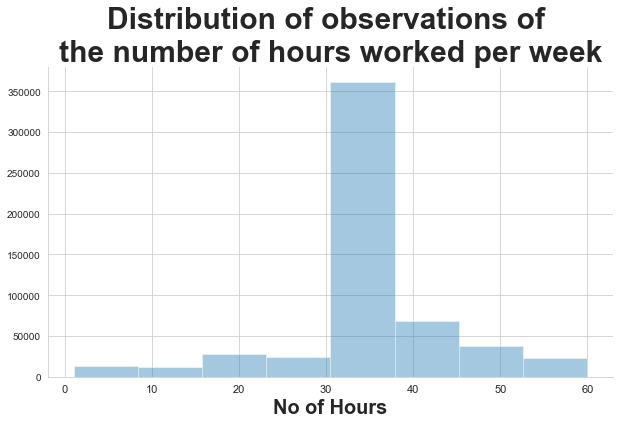

In [53]:
plt.figure(figsize=(9, 6))

sns.set_style('whitegrid')

ax = sns.distplot(data['No of hours'], bins=8, kde=False)


ax.set_xlabel('No of Hours', size=20, fontweight='bold')
ax.set_title('Distribution of observations of \nthe number of hours worked per week', size=30, fontweight='bold')

# Altering the x axis labels values' names


plt.setp(ax.get_xticklabels(), size=11)

plt.tight_layout()
sns.despine()

# plt.savefig('freq_no_of_hours_without_nan.jpeg')